In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
import os
import h5py

# Neuer Pfad zu den Input-Dateien
input_file_paths = [
    '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/CTRL_1/count/sample_filtered_feature_bc_matrix.h5',
    '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/CTRL_2/count/sample_filtered_feature_bc_matrix.h5',
    '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/CTRL_2D/count/sample_filtered_feature_bc_matrix.h5',
    '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/GEM_2/count/sample_filtered_feature_bc_matrix.h5',
    '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/TGFb1_1/count/sample_filtered_feature_bc_matrix.h5',
    '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/TGFb1_2/count/sample_filtered_feature_bc_matrix.h5',
    '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/TGFb1_GEM_1/count/sample_filtered_feature_bc_matrix.h5',
    '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/TGFb1_GEM_2/count/sample_filtered_feature_bc_matrix.h5',
]

# Pfad zur kombinierten Datei
combined_file_path = '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/combined_adata.h5ad'

# Erstelle das Verzeichnis, falls es nicht existiert
os.makedirs(os.path.dirname(combined_file_path), exist_ok=True)

# Öffne die kombinierte HDF5-Datei, um die kombinierten Daten zu speichern
combined_NEW_file = h5py.File(combined_file_path, 'w')
print(combined_NEW_file)
# Schleife durch jede Input-Datei
for input_file_path in input_file_paths:
    with h5py.File(input_file_path, 'r') as file:
        # Schleife durch die Datensätze in der Input-Datei und kopiere sie in die kombinierte Datei
        for dataset_name in file:
            if dataset_name not in combined_NEW_file:
                file[dataset_name].copy(file[dataset_name], combined_NEW_file)

# Schließe die kombinierte Datei
combined_NEW_file.close()

<HDF5 file "combined_adata.h5ad" (mode r+)>


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/storage/users/sac43cg/Results_PDAC/res_Samantha_1/outs/per_sample_outs/CTRL_1/count/sample_filtered_feature_bc_matrix.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
import h5py

# Pfad zur kombinierten Datei
combined_file_path = '/storage/users/sac43cg/Results_PDAC/res_Samantha/outs/per_sample_outs/combinedNEW_data.h5ad'

# Funktion zum rekursiven Durchlaufen und Anzeigen der Gruppen und Datensätze
def print_hdf5_item(name, item):
    if isinstance(item, h5py.Group):
        print(f"Group: {name}")
        for subname, subitem in item.items():
            print_hdf5_item(f"{name}/{subname}", subitem)
    elif isinstance(item, h5py.Dataset):
        print(f"Dataset: {name}")

# Öffne die kombinierte HDF5-Datei im Lese-Modus
with h5py.File(combined_file_path, 'r') as file:
    print_hdf5_item('/', file)

Group: /
Group: //matrix
Dataset: //matrix/barcodes
Dataset: //matrix/data
Group: //matrix/features
Dataset: //matrix/features/_all_tag_keys
Dataset: //matrix/features/feature_type
Dataset: //matrix/features/genome
Dataset: //matrix/features/id
Dataset: //matrix/features/name
Dataset: //matrix/features/pattern
Dataset: //matrix/features/read
Dataset: //matrix/features/sequence
Dataset: //matrix/indices
Dataset: //matrix/indptr
Dataset: //matrix/shape


In [17]:
import anndata
import h5py

# Pfad zur kombinierten HDF5-Datei
combined_file_path = '/storage/users/sac43cg/Results_PDAC/res_Samantha/outs/per_sample_outs/combinedNEW_data.h5ad'

# Öffne die kombinierte HDF5-Datei
with h5py.File(combined_file_path, 'r') as combined_h5:
    # Erstelle ein leeres AnnData-Objekt
    combined_adata = anndata.AnnData()

    # Iteriere durch die Datensätze in der kombinierten HDF5-Datei
    for dataset_name in combined_h5.keys():
        # Füge die Daten aus der HDF5-Datei zum AnnData-Objekt hinzu
        data = combined_h5[dataset_name][:]
        combined_adata.obsm[dataset_name] = data

# Jetzt ist `combined_adata` ein vollständiges AnnData-Objekt mit den Daten aus der kombinierten HDF5-Datei.


TypeError: Accessing a group is done with bytes or str, not <class 'slice'>

In [8]:
print(combined_adata.obs['condition'])

AttributeError: 'File' object has no attribute 'obs'

In [21]:
print(combined_adata)

AnnData object with n_obs × n_vars = 8946 × 2944
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'percent_mito', 'percent_ribo'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'hvg'


In [3]:
sc.pp.calculate_qc_metrics(combined_adata, inplace=True)

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


AnnData object with n_obs × n_vars = 8946 × 36613
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'


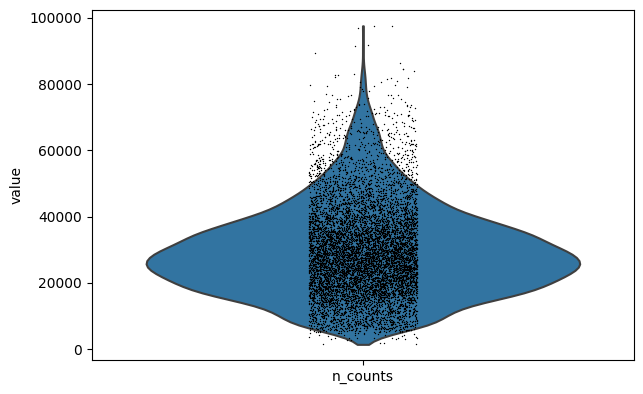

In [4]:
# Step 1: Cell Filtering
sc.pp.filter_cells(combined_adata, min_counts=1000)

print(combined_adata)
sc.pl.violin(combined_adata, keys=['n_counts'], jitter=True, log=False)

In [5]:
# Step 3: Normalization
sc.pp.normalize_total(combined_adata, target_sum=1e4)

In [6]:
# Step 4: Gene Dispersion Filtering
sc.pp.filter_genes_dispersion(combined_adata, min_disp=0.5)

In [7]:
# Step 3: Highly Variable Gene Selection
sc.pp.highly_variable_genes(combined_adata, flavor='cell_ranger', n_top_genes=2000)

In [8]:
# Update the counts matrix and genes list
adata = combined_adata[:, combined_adata.var.highly_variable]

In [9]:
# Optional: Log transformation
sc.pp.log1p(adata)

/home/sac43cg/miniconda3/envs/Gudruns_PDAC/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:372: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
# Step 2: Mitochondrial Gene Filtering
mito_genes = combined_adata.var_names.str.startswith('MT-')
percent_mito = combined_adata[:, mito_genes].X.sum(axis=1) / combined_adata.X.sum(axis=1)
cells_to_keep = percent_mito <= 0.05

# Calculate percent ribosomal genes
ribo_genes = combined_adata.var_names.str.startswith('RP')
percent_ribo = combined_adata[:, ribo_genes].X.sum(axis=1) / combined_adata.X.sum(axis=1)


In [11]:
# Update AnnData with new attributes
combined_adata.obs['percent_mito'] = percent_mito
combined_adata.obs['percent_ribo'] = percent_ribo

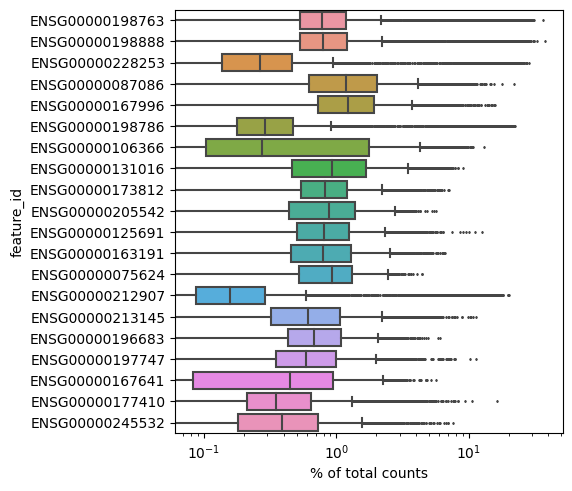

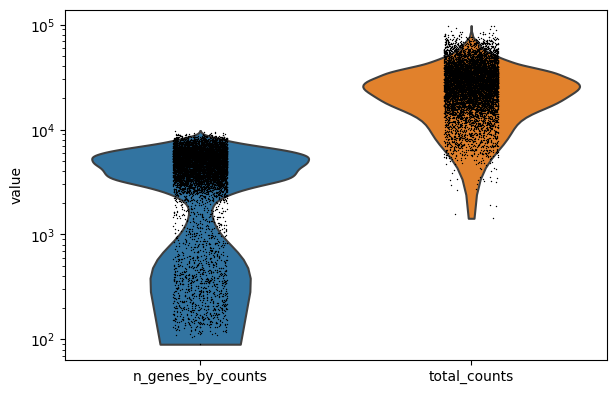

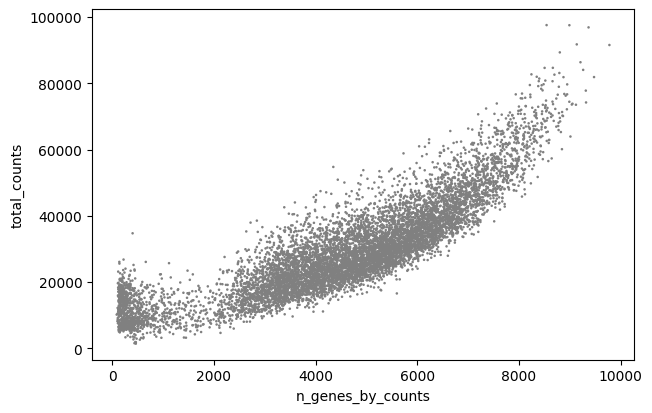

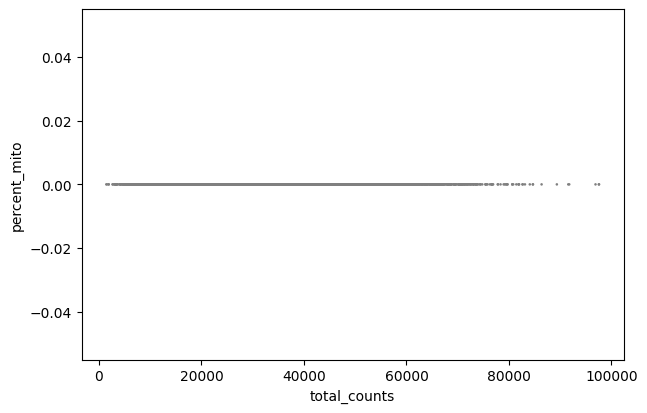

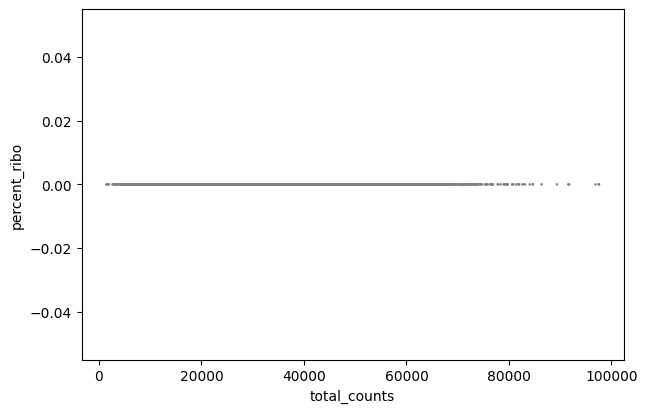

In [12]:
# Visualize QC results
sc.pl.highest_expr_genes(combined_adata, n_top=20, log=True, save='_qc.png')
sc.pl.violin(combined_adata, keys=['n_genes_by_counts', 'total_counts'], jitter=True, log=True, save='_qc.png')
sc.pl.scatter(combined_adata, x='n_genes_by_counts', y='total_counts', save='_qc.png')
sc.pl.scatter(combined_adata, x='total_counts', y='percent_mito', save='_qc.png')
sc.pl.scatter(combined_adata, x='total_counts', y='percent_ribo', save='_qc.png')

#Make sure that the percent_mito and percent_ribo attributes are correctly calculated and added to the .obs attribute of your AnnData object before using them in the plotting functions.


In [15]:
import scanpy as sc
sc.pp.normalize_total(adata, target_sum=1e6)


In [16]:
sc.pp.log1p(adata)  # Log-transform the data

In [17]:
# Save the filtered and preprocessed data
combined_adata.write('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/filtered_preprocessed_data.h5ad')
